In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [63]:
data = pd.read_csv('heart_2020_cleaned.csv')
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [64]:
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [65]:
data.shape

(319795, 18)

In [66]:
data.dropna(axis = 0, inplace = True)
data.isnull().sum().sum()

0

In [67]:
data.columns


Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

##EDA

In [68]:
plt.rcParams['figure.figsize'] = (15,5)

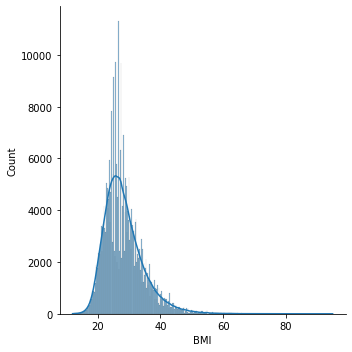

In [69]:
# BMI
sns.displot(x = data.BMI, kde = True)
plt.show()

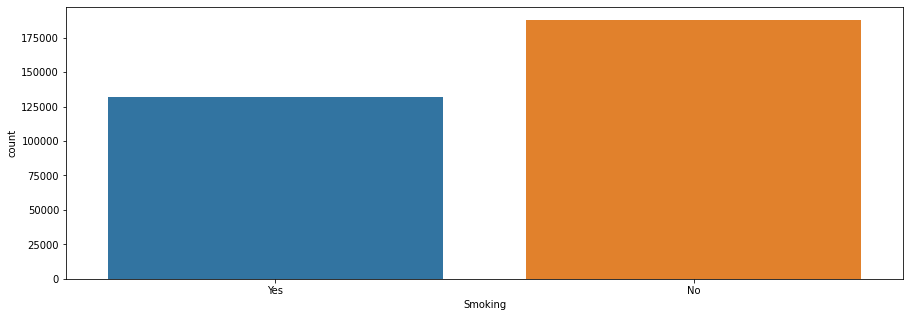

In [70]:
# Smoking
sns.countplot(x = data.Smoking)

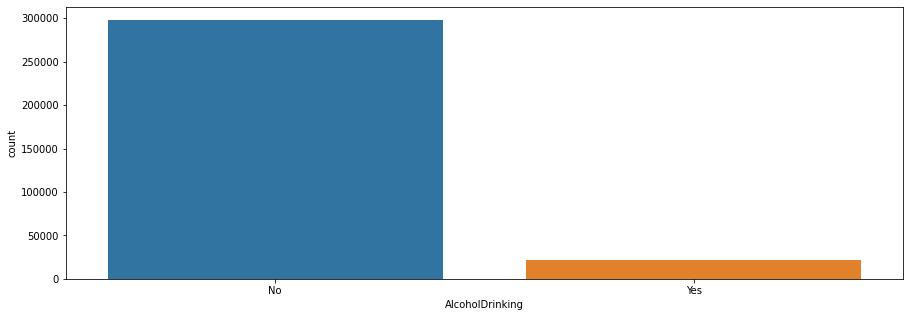

In [71]:
# Alcohol Drinking
sns.countplot(x = data.AlcoholDrinking)

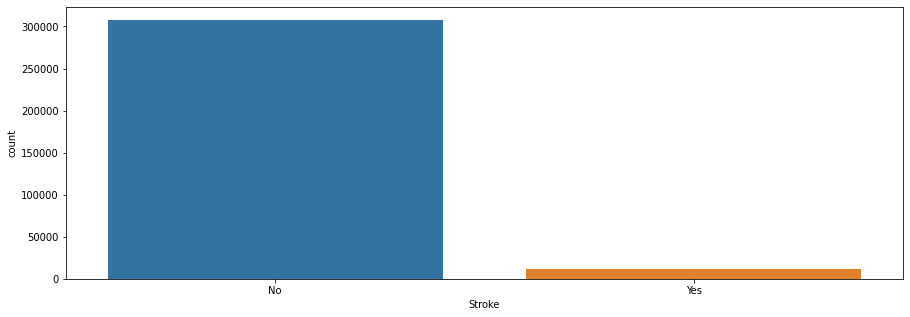

In [72]:
# Stroke
sns.countplot(x = data.Stroke)

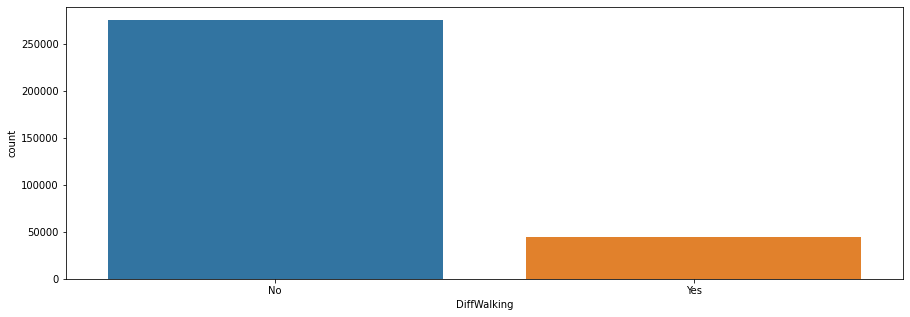

In [73]:
# DiffWSalking
sns.countplot(x = data.DiffWalking)

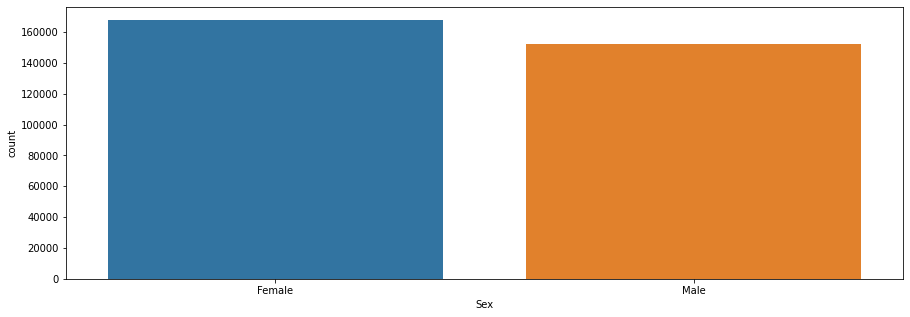

In [74]:
# Sex
sns.countplot(x = data.Sex)

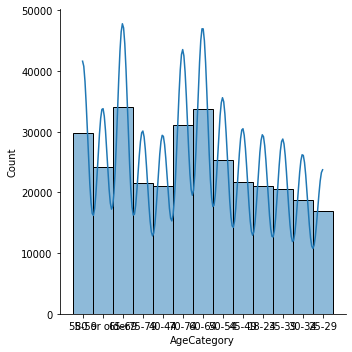

In [75]:
# AgeCategory
sns.displot(x = data.AgeCategory, kde = True)

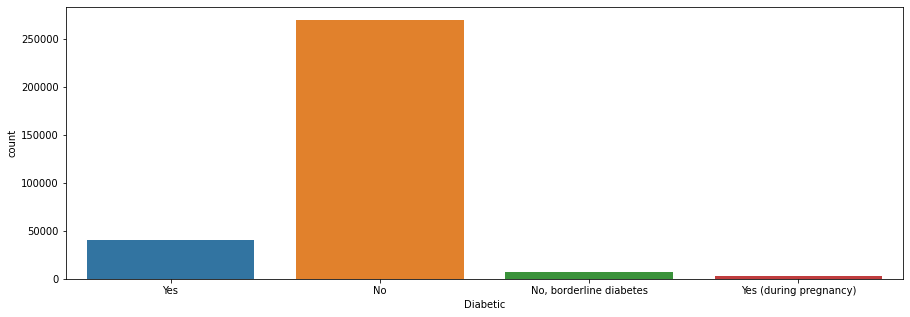

In [76]:
# Diabetic
sns.countplot(x = data.Diabetic)

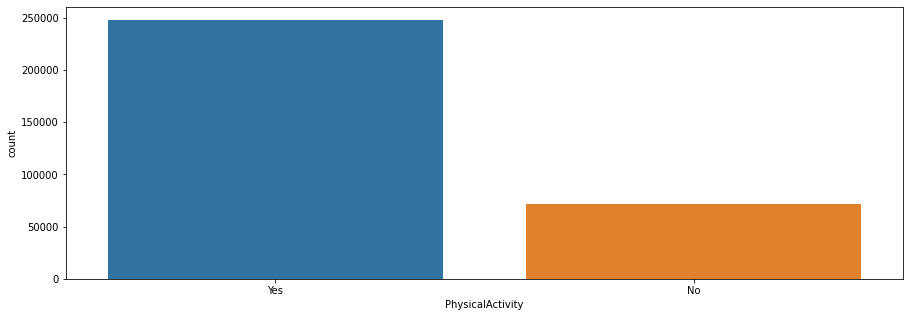

In [77]:
# PhysicalActivity
sns.countplot(x = data.PhysicalActivity)

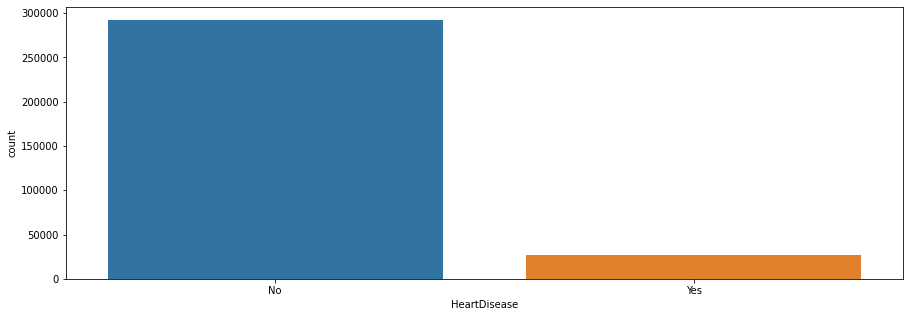

In [78]:
# HeartDisease
sns.countplot(x = data.HeartDisease)

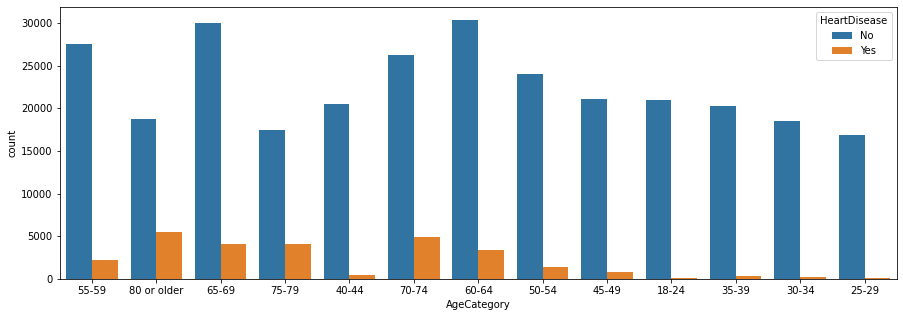

In [79]:
sns.countplot(x = data.AgeCategory, hue = data.HeartDisease)

# Feature Engineering

In [80]:
data.Smoking.replace(('Yes','No'), (1,0), inplace = True)

In [81]:
data.HeartDisease.replace(('Yes','No'), (1,0), inplace = True)

In [82]:
data.AlcoholDrinking.replace(('Yes','No'), (1,0), inplace = True)

In [83]:
data.Stroke.replace(('Yes','No'), (1,0), inplace = True)

In [84]:
data.Sex.replace(('Male','Female'), (1,0), inplace = True)

In [85]:
data.Diabetic.replace(('Yes','No','No, borderline diabetes','Yes (during pregnancy)'), (1,0,0,0), inplace = True)
data.Diabetic.value_counts()

0    278993
1     40802
Name: Diabetic, dtype: int64

In [86]:
data.PhysicalActivity.replace(('Yes','No'), (1,0), inplace = True)

In [87]:

data.AgeCategory.replace(('18-24','25-29','30-34','35-39','40-44','45-49','50-54',
                          '55-59','60-64','65-69','70-74','75-79','80 or older'),
                         (0,0,0,0,0,1,1,1,1,1,1,1,1), inplace = True)
data.AgeCategory.value_counts()

1    221467
0     98328
Name: AgeCategory, dtype: int64

In [88]:
column = ['BMI','Smoking','AlcoholDrinking','Stroke','Sex','Diabetic','PhysicalActivity','SleepTime','AgeCategory']

In [89]:
X = data[column]
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,Sex,Diabetic,PhysicalActivity,SleepTime,AgeCategory
0,16.60,1,0,0,0,1,1,5.0,1
1,20.34,0,0,1,0,0,1,7.0,1
2,26.58,1,0,0,1,1,1,8.0,1
3,24.21,0,0,0,0,0,0,6.0,1
4,23.71,0,0,0,0,0,1,8.0,0


In [90]:
Y = data.HeartDisease
Y.value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [91]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0)
sm.fit(X,Y)
x_resem, y_resem = sm.fit_resample(X, Y)

In [92]:
y_resem.value_counts()

0    292422
1    292422
Name: HeartDisease, dtype: int64

# Model Building

In [93]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x_resem, y_resem, test_size = 0.2, random_state = 0)

In [94]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [95]:
model.score(xtest,ytest)

0.8119929212013439

In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score

ypred = model.predict(xtest)

In [97]:
matrix = confusion_matrix(ytest,ypred)
matrix

array([[49408,  9053],
       [12938, 45570]])

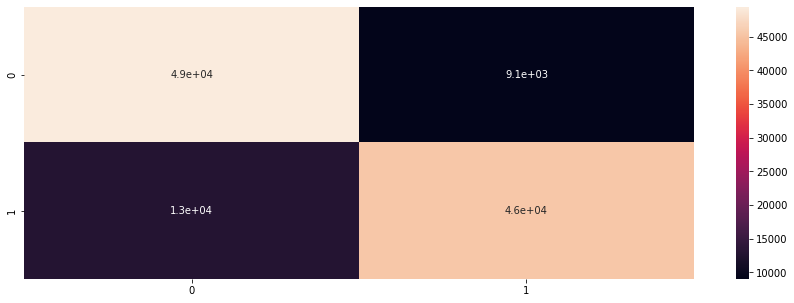

In [98]:
sns.heatmap(matrix, annot = True)

In [99]:
print("Accuracy Score : ", accuracy_score(ytest, ypred))
print("Precision Score : ", precision_score(ytest, ypred))
print("Recall Score : ", recall_score(ytest, ypred))
print("F1 Score : ", f1_score(ytest, ypred))

Accuracy Score :  0.8119929212013439
Precision Score :  0.8342639547443385
Recall Score :  0.7788678471320162
F1 Score :  0.8056147298264843
